In [49]:
%matplotlib widget

isdark = False

from rayoptics.environment import *

In [50]:
opm = OpticalModel()
sm  = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']

osp['pupil'] = PupilSpec(osp, key=['object', 'pupil'], value=16)
osp['fov'] = FieldSpec(osp, key=['object', 'angle'], value=1., flds=[0., 0.707, 1.], is_relative=True)
osp['wvls'] = WvlSpec([('F', 0.5), (587.5618, 1.0), ('C', 0.5)], ref_wl=1)

opm.radius_mode = True

sm.gaps[0].thi=1e10

use_schyrle = True
if use_schyrle:
    sm.add_surface([246, 2, 'N-LASF9', 'Schott', 42/2])
    sm.add_surface([1e9, 290+36])
    sm.add_surface([1e9, 2, 'N-LASF9', 'Schott', 16/2])
    sm.add_surface([-30.6, 36+36])
    sm.add_surface([30.6, 2, 'N-LASF9', 'Schott', 16/2])
    sm.add_surface([1e9, 36+36])
    sm.add_surface([1e9, 2, 'N-LASF9', 'Schott', 16/2])
    sm.add_surface([-30.6, 36])
else:
    sm.add_surface([246, 2, 'N-LASF9', 'Schott', 42/2])
    sm.add_surface([1e9, 290+2*36])
    sm.add_surface([1e9, 2, 'N-LASF9', 'Schott', 16])
    sm.add_surface([-30.6, 36+36+36])
    sm.add_surface([30.6, 2, 'N-LASF9', 'Schott', 16])
    sm.add_surface([1e9, 96])
# add a focusing mirror
#sm.add_surface([30.6, 2, 'N-LASF9', 'Schott', 16])
#sm.add_surface([1e9, 36])
#sm.add_surface([-24.456, .975, 'N-SF5,Schott'])
#sm.set_stop()
#sm.add_surface([21.896, 4.822])
#sm.add_surface([86.759, 5.127, 'N-LAK9', 'Schott'])
#sm.add_surface([-30.4942, 41.2365])

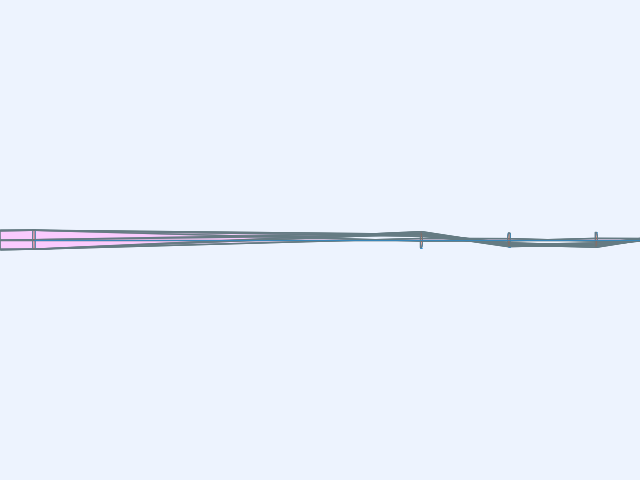

In [51]:
opm.update_model()

layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, is_dark=isdark).plot()

In [52]:
pm.first_order_data()

efl                2071
ffl          -1.694e+04
pp1          -1.487e+04
bfl               293.6
ppk                1777
f/#               129.4
m            -2.071e-07
red          -4.829e+06
obj_dist          1e+10
obj_ang               1
enp_dist             -0
enp_radius            8
na obj            8e-10
n obj                 1
img_dist          293.6
img_ht            36.15
exp_dist          297.9
exp_radius       0.9782
na img        -0.003863
n img                 1
optical invariant       0.1396


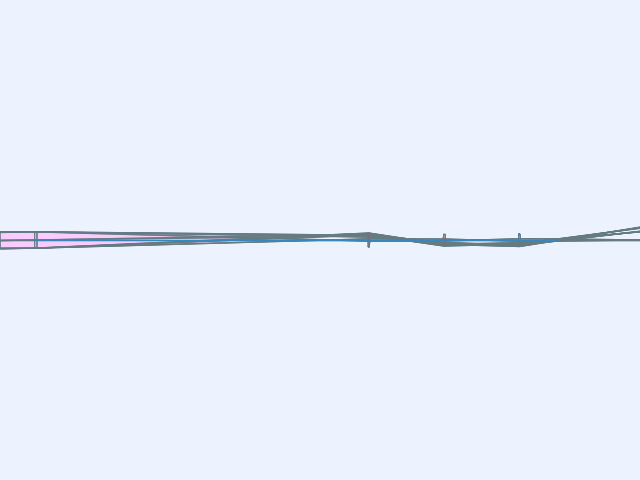

In [53]:
# add a focusing mirror
sm.add_surface([100, 2, 'N-LASF9', 'Schott', 16])
sm.add_surface([1e9, 36])

opm.update_model()

opm.seq_model.gaps[-1].thi = opm.optical_spec.parax_data.fod.bfl
opm.update_model()

layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, is_dark=isdark).plot()

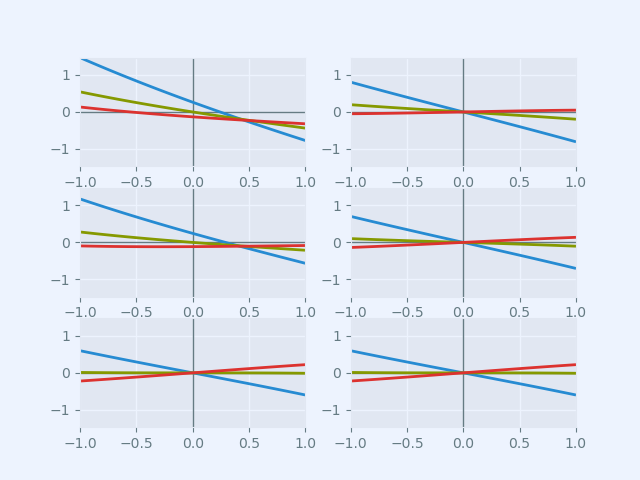

In [54]:
#spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm, scale_type=Fit.User_Scale,
#                      user_scale_value=0.1, is_dark=isdark).plot()
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray',
                     scale_type=Fit.All_Same).plot()

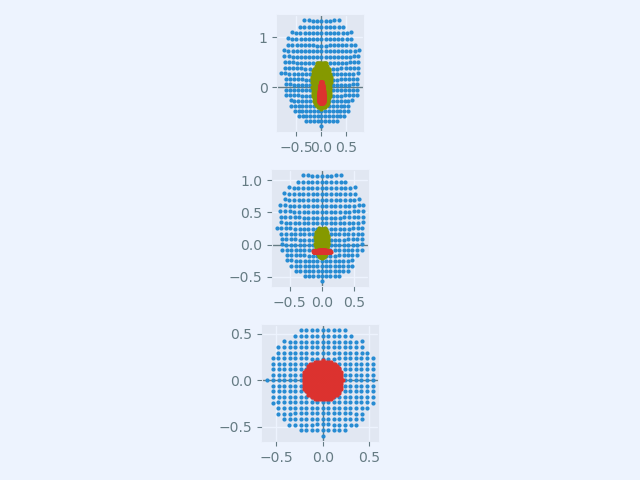

In [55]:
#spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm, scale_type=Fit.User_Scale,
#                      user_scale_value=0.1, is_dark=isdark).plot()
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm, is_dark=isdark).plot()